In [5]:
import numpy as np
from scipy.stats import norm, uniform, cauchy, poisson, expon
from scipy.integrate import quad
from scipy.optimize import root_scalar
from scipy.special import erf
import matplotlib.pyplot as plt

In [2]:
def method1(lambd, T, M):
    t = 0
    S = []

    while True:
        u1 = uniform.rvs(0, 1)
        t = t - np.log(u1)/M
        if t > T:
            break
        u2 = uniform.rvs(0, 1)
        if u2 <= lambd(t)/M:
            S.append(t)
    return np.array(S)

def method2(inverse_Fs, T):
    t = 0
    S = []
    while True:
        u1 = uniform.rvs(0, 1)
        tau = inverse_Fs(t, u1)
        t += tau
        if t > T:
            break
        S.append(t)
    return np.array(S)


In [3]:
def lambda1(t): return (np.sin(t))**2
def lambda3(t): return np.exp(-t**2)
def lambda4(t): return t


## Zadanie 1

In [14]:
def method1_hist(lambd, T, M, ax, n):
    counts = [len(method1(lambd, T, M)) for _ in range(n)]
    mu, _ = quad(lambd, 0, T)

    ax.hist(counts, bins=30, alpha=0.6, density=True)
    x = np.arange(min(counts), max(counts))
    ax.plot(x, poisson.pmf(x, mu), 'o-')
    ax.grid(True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


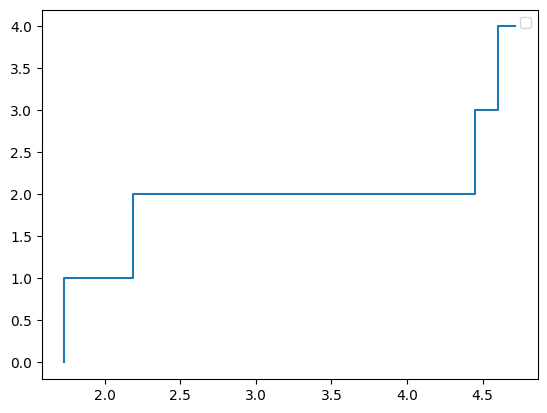

In [12]:
T = 10
M1 = 1

steps_lambd1 = method1(lambda1, T, M1)

Nt1 = np.arange(len(steps_lambd1))


plt.step(steps_lambd1, Nt1)
plt.legend()

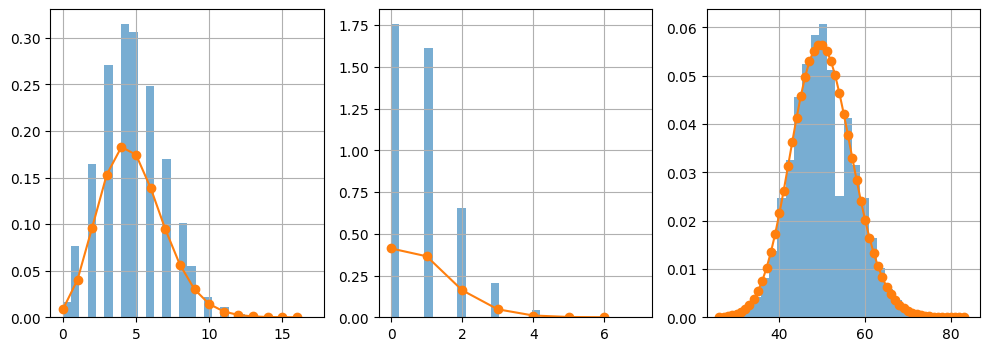

In [7]:
T = 10
n = 10000
M1 = 1
M3 = 1
M4 = T

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
method1_hist(lambda1, T, M1, axes[0], n)
method1_hist(lambda3, T, M3, axes[1], n)
method1_hist(lambda4, T, M4, axes[2], n)

## Zadanie 2

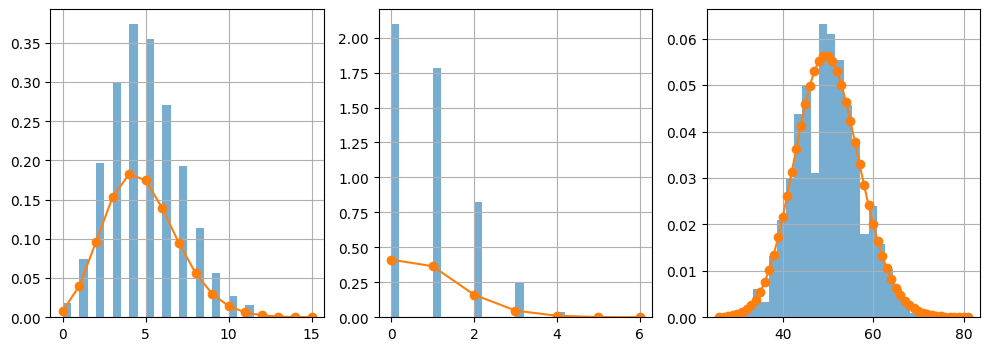

In [11]:
T = 10
n = 10000

def m1(t): return 0.5 * t - 0.25 * np.sin(2*t)
def m3(t): return 0.5 * np.sqrt(np.pi) * erf(t)
def m4(t): return 0.5 * t**2


def F1(t): return m1(t) / m1(T)
def F3(t): return m3(t) / m3(T)
def F4(t): return m4(t) / m4(T)

def inverse_F(F, T):
    def F_inv(y):
        sol = root_scalar(lambda t: F(t) - y, bracket=[0, T], method='brentq')
        return sol.root
    return np.vectorize(F_inv)

F1_inv = inverse_F(F1, T)
F3_inv = inverse_F(F3, T)
F4_inv = inverse_F(F4, T)

def inverse_method(F_inv, mT):
    N_T = poisson.rvs(mT)
    U = np.sort(uniform.rvs(0, 1, N_T))
    if N_T == 0:
        return np.array([])
    return F_inv(U)

def zad2_hist(F_inv, m, ax, n):
    counts = [len(inverse_method(F_inv, m(T))) for _ in range(n)]
    mu = m(T)

    ax.hist(counts, bins=30, alpha=0.6, density=True)
    x = np.arange(min(counts), max(counts)+1)
    ax.plot(x, poisson.pmf(x, mu), 'o-')
    ax.grid(True)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

zad2_hist(F1_inv, m1, axes[0], n)
zad2_hist(F3_inv, m3, axes[1], n)
zad2_hist(F4_inv, m4, axes[2], n)

## Zadanie 3

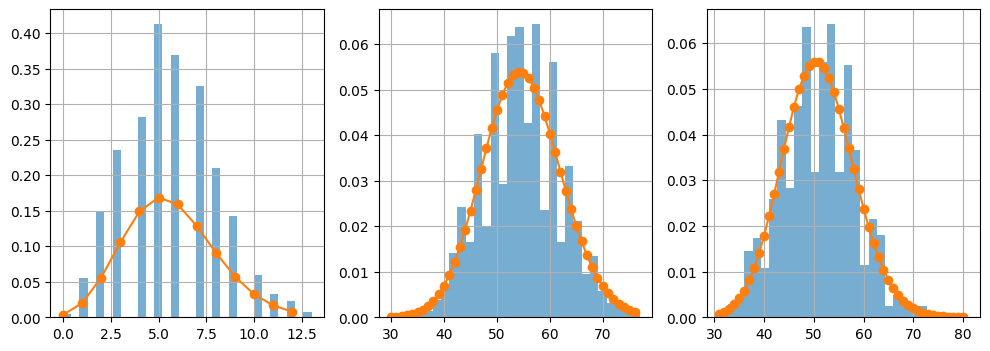

In [17]:
def lambda_sum(f1, f2, t):
    return f1(t) + f2(t)

def lambda_1_3(t):
    return lambda1(t) + lambda3(t)

def lambda_1_4(t):
    return lambda1(t) + lambda4(t)

def lambda_3_4(t):
    return lambda3(t) + lambda4(t)

n = 1000
M1 = 1
M3 = 1
M4 = T

M13 = M1+M3
M14 = M1+M4
M34 = M3+M4

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
method1_hist(lambda_1_3, T, M13, axes[0], n)
method1_hist(lambda_1_4, T, M14, axes[1], n)
method1_hist(lambda_3_4, T, M34, axes[2], n)


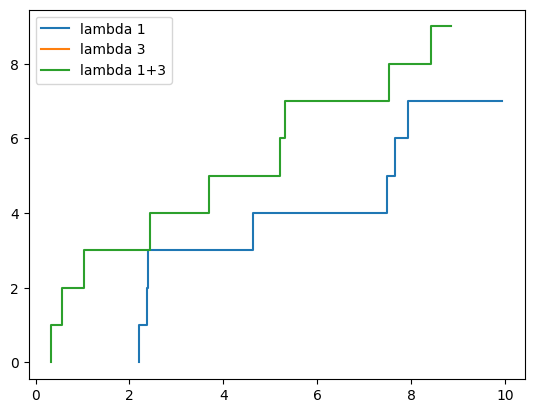

In [46]:
steps_lambd1 = method1(lambda1, T, M1)
steps_lambd3 = method1(lambda3, T, M3)
steps_lambd13 = method1(lambda_1_3, T, M13)

Nt1 = np.arange(len(steps_lambd1))
Nt3 = np.arange(len(steps_lambd3))
Nt13 = np.arange(len(steps_lambd13))


plt.step(steps_lambd1, Nt1, label='lambda 1')
plt.step(steps_lambd3, Nt3, label='lambda 3')
plt.step(steps_lambd13, Nt13, label='lambda 1+3')
plt.legend()

## Zadanie 4

In [47]:
def compound_poisson(T, lambd, distribution):
    N_T = poisson.rvs(lambd*T)
    jumps = np.sort(uniform.rvs(0, T, N_T))
    Z = distribution.rvs(N_T)
    Y = np.cumsum(Z)
    return jumps, Y

## Zadanie 5

In [50]:
def emp_char_f(samples, t_vals):
    samples = np.asarray(samples)
    return np.array([np.mean(np.exp(1j * t * samples)) for t in t_vals])

## Zadanie 6

Text(0.5, 1.0, 'Cauchy (0, 1)')

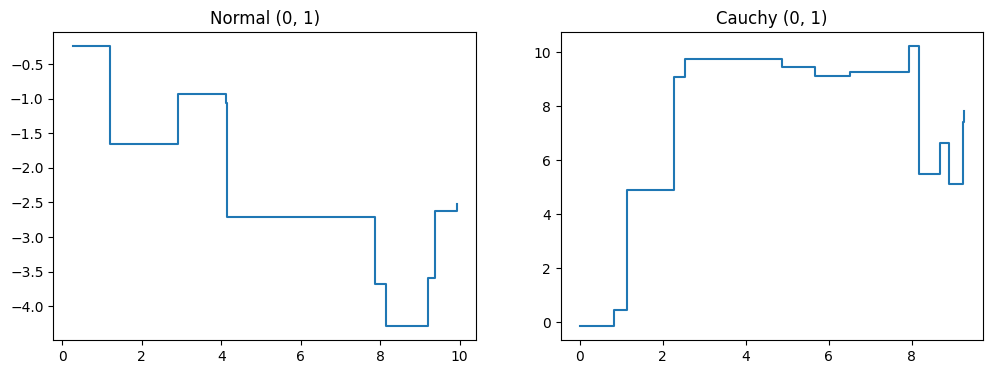

In [45]:
T = 10
lambd = 2

jumps_cauchy, Y_cauchy = compound_poisson(T, lambd, cauchy(0, 1))
jumps_norm, Y_norm = compound_poisson(T, lambd, norm(0, 1))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].step(jumps_norm, Y_norm, where='post')
axes[0].set_title("Normal (0, 1)")
axes[1].step(jumps_cauchy, Y_cauchy, where='post')
axes[1].set_title("Cauchy (0, 1)")


Text(0.5, 1.0, 'Cauchy (0, 1)')

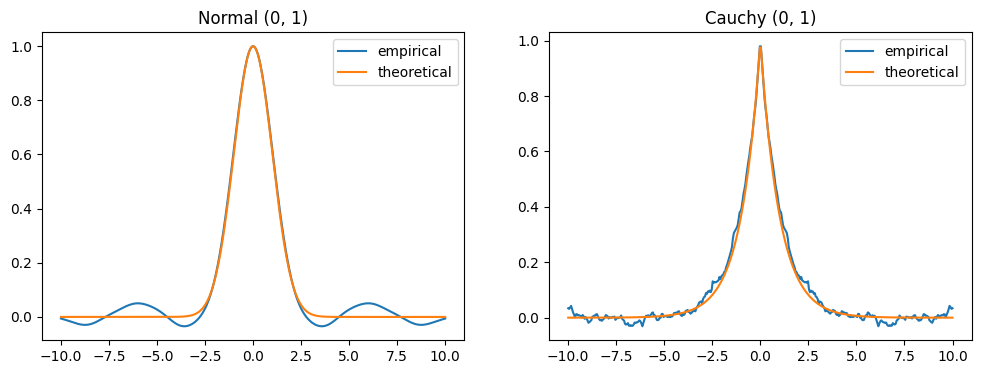

In [ ]:
n = 1000
t_vals = np.linspace(-10, 10, 400)
true_phi_norm = np.exp(-0.5 * t_vals**2)
true_phi_cauchy = np.exp(-abs(t_vals))
samples_norm = norm.rvs(0, 1, n)
samples_cauchy = cauchy.rvs(0, 1, n)

def draw_char_f(samples, true_phi, t_vals, ax):
    
    emp_phi = emp_char_f(samples, t_vals)
    
    ax.plot(t_vals, np.real(emp_phi), label='empirical')
    ax.plot(t_vals, true_phi, label='theoretical')
    ax.legend()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
draw_char_f(samples_norm, true_phi_norm, t_vals, axes[0])
draw_char_f(samples_cauchy, true_phi_cauchy, t_vals, axes[1])
axes[0].set_title("Normal (0, 1)")
axes[1].set_title("Cauchy (0, 1)")


## Zadanie 7

In [75]:
n = 1000

def simulate_risk_process(lambd, r0, t_max, p, dist_func):
    t_values = np.arange(0, t_max + 1)
    R = [r0]
    
    for t in t_values[1:]:
        Nt = poisson.rvs(lambd * t)
        Xi = dist_func(size=Nt)
        total_claims = np.sum(Xi)
        p_value = p(t)
        Rt = r0 + p_value - total_claims
        R.append(Rt)
        if Rt <= 0:
            break

    return t_values[:len(R)], R

def p(t):
    return t/2

def dist_func(size):
    return expon.rvs(1, size)

lambd = 1

t_max = 5

def ruin_prob(n):
    ruins1 = 0
    ruins3 = 0
    ruins5 = 0
    for _ in range(n):
        t, R = simulate_risk_process(lambd, 5, t_max, p, dist_func)
        if len(t) == 6:
            ruins5 += 1
        elif len(t) == 4:
            ruins3 += 1
        elif len(t) == 2:
            ruins1 += 1
    return ruins1/n, ruins3/n, ruins5/n

print(ruin_prob(n))


(0.04, 0.139, 0.575)
